<a href="https://colab.research.google.com/github/i-r-a/toxic/blob/master/toxNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from keras import Sequential
from keras import layers
from nltk.corpus import stopwords
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
train = pd.read_csv('drive/My Drive/new_clean_data.csv')

In [4]:
y = train['toxic']
x = train['comment_text']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [5]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [6]:
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [7]:
input_dim = X_train.shape[1]

In [8]:
model = Sequential()
model.add(layers.Dense(10,input_dim = input_dim, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                2829100   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,829,111
Trainable params: 2,829,111
Non-trainable params: 0
_________________________________________________________________


##Toxic vs Non-toxic

In [10]:
history = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [11]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

In [12]:
print(accuracy)

0.9729238152503967


In [13]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [14]:
predictions = model.predict(X_train)

In [15]:
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))

In [16]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    161729
           1       0.94      0.76      0.84     17063

    accuracy                           0.97    178792
   macro avg       0.96      0.88      0.91    178792
weighted avg       0.97      0.97      0.97    178792



In [17]:
print(confusion_matrix(y_train,pred))

[[160923    806]
 [  4035  13028]]


In [18]:
fpr,tpr,thresh = roc_curve(y_train,pred)

In [19]:
roc_auc = auc(fpr,tpr)
print(fpr)
print(tpr)
print(len(pred))

[0.         0.00498365 1.        ]
[0.         0.76352341 1.        ]
178792


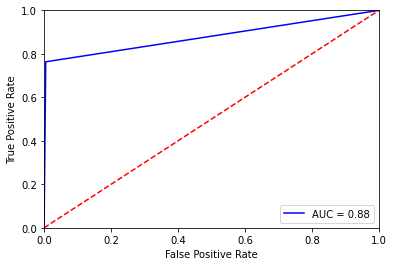

In [20]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [21]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

In [22]:
print(accuracy)

0.9494608044624329


In [23]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     40377
           1       0.84      0.59      0.69      4321

    accuracy                           0.95     44698
   macro avg       0.90      0.79      0.83     44698
weighted avg       0.95      0.95      0.95     44698

[[39889   488]
 [ 1771  2550]]


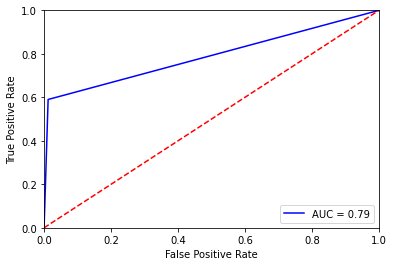

In [24]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


##Severe Toxic

In [25]:
y = train['severe_toxic']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [26]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [27]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    177239
           1       0.78      0.32      0.45      1553

    accuracy                           0.99    178792
   macro avg       0.89      0.66      0.72    178792
weighted avg       0.99      0.99      0.99    178792

[[177098    141]
 [  1058    495]]


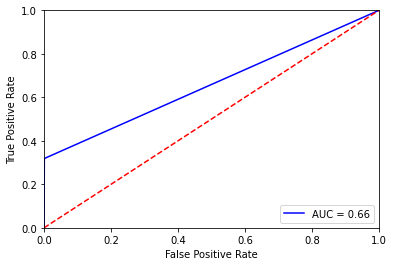

In [28]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [29]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     44289
           1       0.48      0.18      0.26       409

    accuracy                           0.99     44698
   macro avg       0.74      0.59      0.63     44698
weighted avg       0.99      0.99      0.99     44698

[[44209    80]
 [  335    74]]


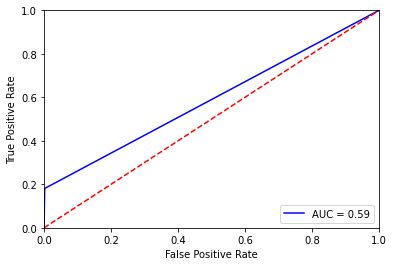

In [30]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [31]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.9932938814163208
Test accuracy:
0.9907154440879822


##Obscene

In [32]:
y = train['obscene']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [33]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [34]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    169114
           1       0.93      0.89      0.91      9678

    accuracy                           0.99    178792
   macro avg       0.96      0.94      0.95    178792
weighted avg       0.99      0.99      0.99    178792

[[168436    678]
 [  1052   8626]]


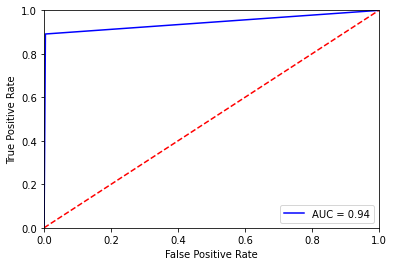

In [35]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [36]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     42236
           1       0.81      0.67      0.73      2462

    accuracy                           0.97     44698
   macro avg       0.89      0.83      0.86     44698
weighted avg       0.97      0.97      0.97     44698

[[41837   399]
 [  811  1651]]


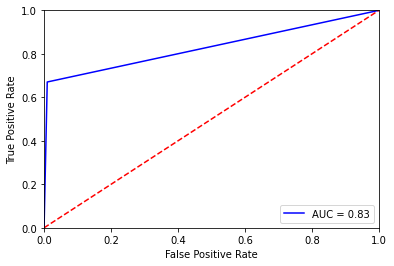

In [37]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [38]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.9903239607810974
Test accuracy:
0.9729294180870056


##Threat

In [39]:
y = train['threat']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [40]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [41]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    178245
           1       0.95      0.04      0.07       547

    accuracy                           1.00    178792
   macro avg       0.98      0.52      0.54    178792
weighted avg       1.00      1.00      1.00    178792

[[178244      1]
 [   526     21]]


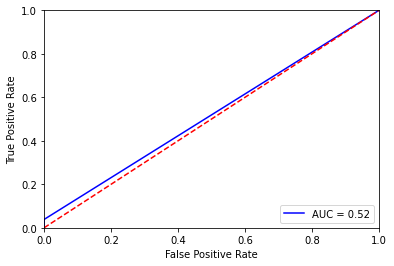

In [42]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [43]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44556
           1       0.38      0.02      0.04       142

    accuracy                           1.00     44698
   macro avg       0.69      0.51      0.52     44698
weighted avg       0.99      1.00      1.00     44698

[[44551     5]
 [  139     3]]


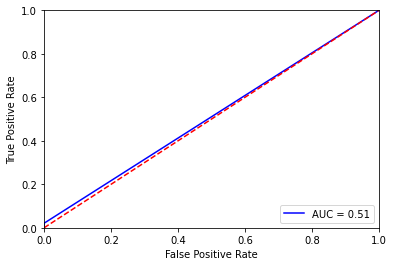

In [44]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [45]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.9970524311065674
Test accuracy:
0.9967783689498901


##Insult

In [46]:
y = train['insult']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [47]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [48]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    169768
           1       0.88      0.89      0.88      9024

    accuracy                           0.99    178792
   macro avg       0.94      0.94      0.94    178792
weighted avg       0.99      0.99      0.99    178792

[[168667   1101]
 [  1031   7993]]


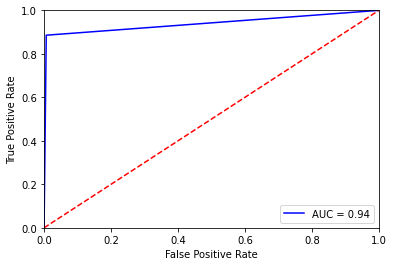

In [49]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [50]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     42418
           1       0.71      0.62      0.66      2280

    accuracy                           0.97     44698
   macro avg       0.84      0.80      0.82     44698
weighted avg       0.97      0.97      0.97     44698

[[41838   580]
 [  870  1410]]


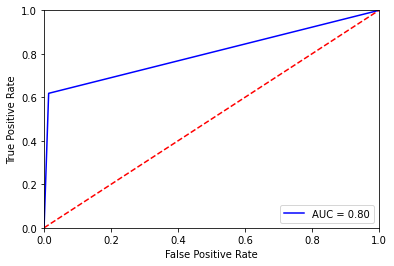

In [51]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [52]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.9880755543708801
Test accuracy:
0.9675600528717041


##Identity Hate

In [53]:
y = train['identity_hate']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [54]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [55]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177079
           1       0.92      0.53      0.67      1713

    accuracy                           1.00    178792
   macro avg       0.96      0.76      0.83    178792
weighted avg       0.99      1.00      0.99    178792

[[177005     74]
 [   813    900]]


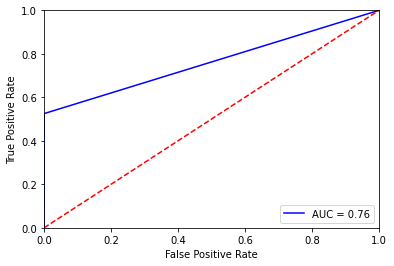

In [56]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [57]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     44294
           1       0.56      0.17      0.26       404

    accuracy                           0.99     44698
   macro avg       0.77      0.58      0.63     44698
weighted avg       0.99      0.99      0.99     44698

[[44240    54]
 [  336    68]]


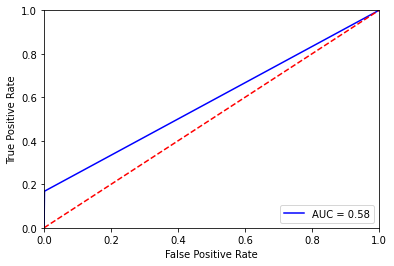

In [58]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [59]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.9950389266014099
Test accuracy:
0.9912747740745544
